### <font color='red'> Project 2

Project Description:
- Use same datasets as Project 1.
- Preprocess data: Explore data and apply data scaling.

Regression Task:
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 1, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Classification Task:
- Apply two voting classifiers - one with hard voting and one with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result table from project 1, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Deliverables:
- Use markdown to provide inline comments for this project.
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs.
- Visualization encouraged.
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convetion:
    Project2_Regression_GroupXX_Firstname1_Firstname2.ipynb
    Project2_Classification_GroupXX_Firstname1_Firstname2.ipynb
- If you are submitting single file, then please follow below naming convetion:
    Project2_Both_GroupXX_Firstname1_Firstname2.ipynb

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# loading datasets
audit_risk = pd.read_csv('audit_risk.csv')
trial = pd.read_csv('trial.csv')

In [3]:
# Exploring datasets
print(audit_risk.shape)
print(trial.shape)

(776, 27)
(776, 18)


In [4]:
audit_risk.info() 
#one missing values in Money_Value, and Location_ID dtype is object; need to be fixed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
Sector_score      776 non-null float64
LOCATION_ID       776 non-null object
PARA_A            776 non-null float64
Score_A           776 non-null float64
Risk_A            776 non-null float64
PARA_B            776 non-null float64
Score_B           776 non-null float64
Risk_B            776 non-null float64
TOTAL             776 non-null float64
numbers           776 non-null float64
Score_B.1         776 non-null float64
Risk_C            776 non-null float64
Money_Value       775 non-null float64
Score_MV          776 non-null float64
Risk_D            776 non-null float64
District_Loss     776 non-null int64
PROB              776 non-null float64
RiSk_E            776 non-null float64
History           776 non-null int64
Prob              776 non-null float64
Risk_F            776 non-null float64
Score             776 non-null float64
Inherent_Risk     776 non-null float64
CON

In [5]:
audit_risk.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


In [6]:
trial.info() #No missing values but Location_ID is object; need to be fixed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
Sector_score     776 non-null float64
LOCATION_ID      776 non-null object
PARA_A           776 non-null float64
SCORE_A          776 non-null int64
PARA_B           776 non-null float64
SCORE_B          776 non-null int64
TOTAL            776 non-null float64
numbers          776 non-null float64
Marks            776 non-null int64
Money_Value      775 non-null float64
MONEY_Marks      776 non-null int64
District         776 non-null int64
Loss             776 non-null int64
LOSS_SCORE       776 non-null int64
History          776 non-null int64
History_score    776 non-null int64
Score            776 non-null float64
Risk             776 non-null int64
dtypes: float64(7), int64(10), object(1)
memory usage: 109.2+ KB


In [7]:
trial.describe()

,Sector_score,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,2.450194,3.512887,10.799988,3.131443,13.218481,5.067655,2.237113,14.137631,2.909794,2.505155,0.029639,2.061856,0.104381,2.167526,2.702577,0.626289
std,24.319017,5.678870,1.740549,50.083624,1.698042,51.312829,0.264449,0.803517,66.606519,1.597452,1.228678,0.184280,0.375080,0.531031,0.679869,0.858923,0.484100
min,1.850000,0.000000,2.000000,0.000000,2.000000,0.000000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.210000,2.000000,0.000000,2.000000,0.537500,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.875000,2.000000,0.405000,2.000000,1.370000,5.000000,2.000000,0.090000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.400000,1.000000
75%,55.570000,2.480000,6.000000,4.160000,4.000000,7.707500,5.000000,2.000000,5.595000,4.000000,2.000000,0.000000,2.000000,0.000000,2.000000,3.250000,1.000000
max,59.850000,85.000000,6.000000,1264.630000,6.000000,1268.910000,9.000000,6.000000,935.030000,6.000000,6.000000,2.000000,6.000000,9.000000,6.000000,5.200000,1.000000


In [8]:
# Remove categorical values in the column of LOCATION_ID
# Did not assign new values because they could be already one of the LOCATION_ID
audit_risk = audit_risk[audit_risk.LOCATION_ID != 'LOHARU']
audit_risk = audit_risk[audit_risk.LOCATION_ID != 'NUH']
audit_risk = audit_risk[audit_risk.LOCATION_ID != 'SAFIDON']

trial = trial[trial.LOCATION_ID != 'LOHARU']
trial = trial[trial.LOCATION_ID != 'NUH']
trial = trial[trial.LOCATION_ID != 'SAFIDON']

In [9]:
# Changing dtype(object to integer)
audit_risk['LOCATION_ID'] = pd.to_numeric(audit_risk['LOCATION_ID'])
trial['LOCATION_ID'] = pd.to_numeric(trial['LOCATION_ID'])

In [10]:
# Removing duplicated columns
# We removed duplicated parameters with different scales in advance 
trial.drop(['Sector_score','LOCATION_ID','PARA_A','SCORE_A',
            'PARA_B','SCORE_B','TOTAL','numbers','District','Money_Value','History','Score','Risk'], axis=1, inplace = True)

In [11]:
# Dealing with missing values
print(audit_risk.isnull().sum().sort_values(ascending = False))
audit_risk['Money_Value'] = audit_risk.fillna(audit_risk['Money_Value'].mean())

Money_Value       1
Risk              0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Score_MV          0
Audit_Risk        0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Sector_score      0
dtype: int64


In [12]:
trial.isnull().sum().sort_values(ascending = False)

History_score    0
LOSS_SCORE       0
Loss             0
MONEY_Marks      0
Marks            0
dtype: int64

In [13]:
# Checking the shape again 
print(audit_risk.shape)
print(trial.shape)

(773, 27)
(773, 5)


In [14]:
# Merging datasets
df = pd.concat([audit_risk, trial], axis=1)
df.shape

(773, 32)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 773 entries, 0 to 775
Data columns (total 32 columns):
Sector_score      773 non-null float64
LOCATION_ID       773 non-null int64
PARA_A            773 non-null float64
Score_A           773 non-null float64
Risk_A            773 non-null float64
PARA_B            773 non-null float64
Score_B           773 non-null float64
Risk_B            773 non-null float64
TOTAL             773 non-null float64
numbers           773 non-null float64
Score_B.1         773 non-null float64
Risk_C            773 non-null float64
Money_Value       773 non-null float64
Score_MV          773 non-null float64
Risk_D            773 non-null float64
District_Loss     773 non-null int64
PROB              773 non-null float64
RiSk_E            773 non-null float64
History           773 non-null int64
Prob              773 non-null float64
Risk_F            773 non-null float64
Score             773 non-null float64
Inherent_Risk     773 non-null float64
CONT

## Exploring & Scaling dataset

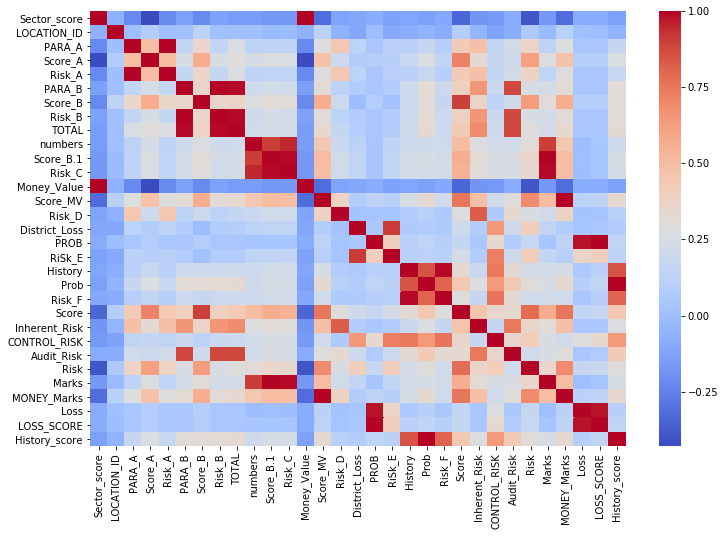

In [16]:
#Exploring dataset - (1) Correlation within variables
plt.figure(figsize=(12,8))
sns.heatmap(df.drop(['Detection_Risk'], axis=1).corr(), cmap = 'coolwarm')

In [17]:
# Correlation with target variables
cor = pd.DataFrame(df.drop("Audit_Risk", axis=1).apply(lambda x: x.corr(df.Audit_Risk)).sort_values(ascending = False)).rename(columns = {0:'Correlation'})
cor.dropna()

,Correlation
TOTAL,0.888086
PARA_B,0.887780
Risk_B,0.887556
Inherent_Risk,0.750873
History_score,0.431217
Prob,0.431217
CONTROL_RISK,0.357872
Risk_D,0.334091
Score,0.332883
History,0.329682


In [18]:
from sklearn.preprocessing import MinMaxScaler # Used MinMaxScaler
reg_data = df.drop(['Audit_Risk','Risk'], axis=1)
reg_target = df['Audit_Risk']

In [19]:
# Splitting training and test data
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(reg_data, reg_target, random_state=0)

# Scaling data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

# Regression Task 

## (1) Two models with bagging and pasting

In [20]:
#importing models
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import BaggingRegressor

In [21]:
#Linear Regression
print('(1) Linear Regression')
print()

lreg = LinearRegression()

lreg_bag = BaggingRegressor(lreg, bootstrap=True, n_jobs=-1, random_state=0)
lreg_bag.fit(X_train, y_train)
print("Bagging")
print("Train Score: {:4f}".format(lreg_bag.score(X_train, y_train)))
print("Test Score: {:4f}".format(lreg_bag.score(X_test, y_test)))
print()

lreg_pas = BaggingRegressor(lreg, bootstrap=False, n_jobs=-1, random_state=0)
lreg_pas.fit(X_train, y_train)
print("Pasting")
print("Train Score: {:4f}".format(lreg_pas.score(X_train, y_train)))
print("Test Score: {:4f}".format(lreg_pas.score(X_test, y_test)))

(1) Linear Regression

Bagging
Train Score: 0.825529
Test Score: 0.525339

Pasting
Train Score: 0.854711
Test Score: 0.518959


In [22]:
#LASSO Regression
print('(2) Lasso Regression')
print()

lasso = Lasso(alpha=1.0) #the best parameter alpha=1.0
lasso_bag = BaggingRegressor(lasso, bootstrap=True, n_jobs=-1, random_state=0)
lasso_bag.fit(X_train, y_train)
print("Bagging")
print("Train Score: {:4f}".format(lasso_bag.score(X_train, y_train)))
print("Test Score: {:4f}".format(lasso_bag.score(X_test, y_test)))
print()

print("Pasting")
lasso_pas = BaggingRegressor(lasso, bootstrap=False, n_jobs=-1, random_state=0)
lasso_pas.fit(X_train, y_train)
print("Train Score: {:4f}".format(lasso_pas.score(X_train, y_train)))
print("Test Score: {:4f}".format(lasso_pas.score(X_test, y_test)))

(2) Lasso Regression

Bagging
Train Score: 0.335160
Test Score: 0.079369

Pasting
Train Score: 0.331951
Test Score: 0.065304


In [23]:
#KNN Regression
print('(3) KNN Regression')
print()

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

knn_reg = KNeighborsRegressor(3)  #the best parameter n=3
knn_reg.fit(X_train, y_train)
knn_bag = BaggingRegressor(knn_reg, bootstrap=True, n_jobs=-1, random_state=0)
lasso_bag.fit(X_train, y_train)
print("Bagging")
print("Train Score: {:4f}".format(lasso_bag.score(X_train, y_train)))
print("Test Score: {:4f}".format(lasso_bag.score(X_test, y_test)))
print()

print("Pasting")
lasso_pas = BaggingRegressor(knn_reg, bootstrap=False, n_jobs=-1, random_state=0)
lasso_pas.fit(X_train, y_train)
print("Train Score: {:4f}".format(lasso_pas.score(X_train, y_train)))
print("Test Score: {:4f}".format(lasso_pas.score(X_test, y_test)))

(3) KNN Regression

Bagging
Train Score: 0.335160
Test Score: 0.079369

Pasting
Train Score: 0.756169
Test Score: 0.178808


## (2) Two models with Adaboost boosting

In [24]:
from sklearn.ensemble import AdaBoostRegressor

#Linear Regression
print('(1) Linear Regression')
print()

param_grid = { 'n_estimators': [10, 50, 100],
              'learning_rate' : [0.1,0.5,1] }
ada_grid = GridSearchCV(AdaBoostRegressor(LinearRegression()), 
                        param_grid,n_jobs=-1)
ada_grid.fit(X_train, y_train)
print('Best Parameter: {}'.format(ada_grid.best_params_))

ada_reg = AdaBoostRegressor(LinearRegression(), learning_rate=0.1, n_estimators=10)
ada_reg.fit(X_train, y_train)
print("Train Score: {:4f}".format(ada_reg.score(X_train, y_train)))
print("Test Score: {:4f}".format(ada_reg.score(X_test, y_test)))
print()


(1) Linear Regression

Best Parameter: {'learning_rate': 0.1, 'n_estimators': 10}
Train Score: 0.861234
Test Score: 0.575278



In [25]:
from sklearn.ensemble import AdaBoostRegressor

#Linear Regression
print('(2) LASSO Regression')
print()

param_grid = { 'n_estimators': [10, 50, 100],
              'learning_rate' : [0.1,0.5,1] }
ada_grid = GridSearchCV(AdaBoostRegressor(Lasso(alpha=1.0)), 
                        param_grid,n_jobs=-1)
ada_grid.fit(X_train, y_train)
print('Best Parameter: {}'.format(ada_grid.best_params_))

ada_reg = AdaBoostRegressor(Lasso(alpha=1.0), learning_rate=0.1, n_estimators=50)
ada_reg.fit(X_train, y_train)
print("Train Score: {:4f}".format(ada_reg.score(X_train, y_train)))
print("Test Score: {:4f}".format(ada_reg.score(X_test, y_test)))
print()


(2) LASSO Regression

Best Parameter: {'learning_rate': 1, 'n_estimators': 10}
Train Score: 0.658038
Test Score: 0.240431



## (3) One model with Gradient boosting


In [26]:
from sklearn.ensemble import GradientBoostingRegressor

#Linear Regression
print('(1) Gradient Boosted Regression Trees')
print()

param_grid = {
    "learning_rate": [0.01, 0.05, 0.1, 0.5],
    "max_depth":[3,5,8, 10],
    "subsample":[0.5, 0.75, 1.0],
    "n_estimators":[3, 5, 8, 10]
    }

gbr_grid = GridSearchCV(GradientBoostingRegressor(),  
                        param_grid,n_jobs=-1)
gbr_grid.fit(X_train, y_train)
print('Best Parameter: {}'.format(gbr_grid.best_params_))


gbr = GradientBoostingRegressor(learning_rate=0.5, max_depth=8, n_estimators=10, subsample=0.75, random_state=0)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Train Score: {:4f}".format(gbr.score(X_train, y_train)))
print("Test Score: {:4f}".format(gbr.score(X_test, y_test)))
print("Mean Squared Error: {:4f}".format(mse))


(1) Gradient Boosted Regression Trees

Best Parameter: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 8, 'subsample': 0.5}
Train Score: 0.999957
Test Score: 0.289579
Mean Squared Error: 3530.585249


### (4) PCA 

In [27]:
# Splitting training and test data
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(reg_data, reg_target, random_state=0)

# Scaling data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

# Dimension Reduction
from sklearn.decomposition import PCA
pca = PCA(n_components= 0.95)
X_reduced_train = pca.fit_transform(X_train)
X_reduced_test = pca.transform(X_test)

In [28]:
print('Number of dimensions:', pca.n_components_) 
print('Explained Variance Ratio:',1- pca.explained_variance_ratio_.sum())

Number of dimensions: 8
Explained Variance Ratio: 0.04320262807034925


In [29]:
#(1) Linear Regression

lreg = LinearRegression()
param_grid = {'fit_intercept':[True,False], 'normalize':[True,False]}

#cv =5
grid = GridSearchCV(lreg, param_grid, cv=5, return_train_score=True, n_jobs = -1)
grid.fit(X_reduced_train, y_train)
print('cv=5')
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print()


cv=5
Best parameters: {'fit_intercept': True, 'normalize': False}
Best cross-validation score: 0.30



C:\Users\josep\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [30]:
lreg_accuracy_train = grid.best_estimator_.score(X_reduced_test, y_test)
lreg_accuracy_test = grid.best_estimator_.score(X_reduced_test, y_test)

print('Linear Regression - Train Score: %.2f'%lreg_accuracy_train)
print('Linear Regression - Test Score: %.2f '%lreg_accuracy_test)

Linear Regression - Train Score: 0.23
Linear Regression - Test Score: 0.23 


In [31]:
report_table = [['Linear Regression', '',
                 grid.best_estimator_.score(X_reduced_train, y_train), 
                 grid.best_estimator_.score(X_reduced_test, y_test)]]

In [32]:
#(2) Ridge Regression
from sklearn.linear_model import Ridge
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# create and fit a ridge regression model, testing each alpha
# cv = 5
model = Ridge(random_state=0)
grid = GridSearchCV(model, param_grid, cv = 5)
grid.fit(X_reduced_train, y_train)
# summarize the results of the grid search
print('cv=5')
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print()


C:\Users\josep\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


cv=5
Best parameters: {'alpha': 100}
Best cross-validation score: 0.42



In [33]:
ridge_accuracy_train = grid.best_estimator_.score(X_reduced_train, y_train)
ridge_accuracy_test = grid.best_estimator_.score(X_reduced_test, y_test)

print('Ridge Regression - Train Score: %.2f'%ridge_accuracy_train)
print('Ridge Regression - Test Score: %.2f '%ridge_accuracy_test)

Ridge Regression - Train Score: 0.39
Ridge Regression - Test Score: 0.14 


In [34]:
report_table = report_table + [['Ridge', 'alpha = 100', 
                                grid.best_estimator_.score(X_reduced_train, y_train), 
                                grid.best_estimator_.score(X_reduced_test, y_test)]]

In [35]:
#(3) LASSO
from sklearn.linear_model import Lasso
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# create and fit a ridge regression model, testing each alpha
# cv = 5
model = Lasso(random_state=0)
grid = GridSearchCV(model, param_grid, cv = 5)
grid.fit(X_reduced_train, y_train)
# summarize the results of the grid search
print('cv=5')
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print()


C:\Users\josep\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


cv=5
Best parameters: {'alpha': 1}
Best cross-validation score: 0.39



In [36]:
lasso_accuracy_train = grid.best_estimator_.score(X_reduced_train, y_train)
lasso_accuracy_test = grid.best_estimator_.score(X_reduced_test, y_test)

print('Lasso Regression - Train Score: %.2f'%lasso_accuracy_train)
print('Lasso Regression - Test Score: %.2f '%lasso_accuracy_test)

Lasso Regression - Train Score: 0.36
Lasso Regression - Test Score: 0.14 


In [37]:
report_table = report_table + [['Lasso', 'alpha = 1.0', 
                                grid.best_estimator_.score(X_reduced_train, y_train), 
                                grid.best_estimator_.score(X_reduced_test, y_test)]]

In [38]:
#(4) KNN
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
param_grid = {'n_neighbors':np.arange(1,11,1)}

#cv =5
grid = GridSearchCV(knn, param_grid, cv=5, return_train_score=True, n_jobs = -1)
grid.fit(X_reduced_train, y_train)
print('cv=5')
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print()


cv=5
Best parameters: {'n_neighbors': 3}
Best cross-validation score: 0.46



C:\Users\josep\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [39]:
knnreg_accuracy_train = grid.best_estimator_.score(X_reduced_train, y_train)
knnreg_accuracy_test = grid.best_estimator_.score(X_reduced_test, y_test)

print('KNN Regression - Train Score: %.2f'%knnreg_accuracy_train)
print('KNN Regression - Test Score: %.2f '%knnreg_accuracy_test)

KNN Regression - Train Score: 0.76
KNN Regression - Test Score: 0.13 


In [40]:
report_table =report_table +  [['KNN', 'n = 3', 
                                grid.best_estimator_.score(X_reduced_train, y_train), 
                                grid.best_estimator_.score(X_reduced_test, y_test)]]

In [41]:
#(5) Polynomial Regression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': np.arange(4), 
        'linearregression__fit_intercept': [True, False], 
        'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=5, n_jobs=-1)

grid.fit(X_reduced_train, y_train)
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best parameters: {'linearregression__fit_intercept': True, 'linearregression__normalize': True, 'polynomialfeatures__degree': 1}
Best cross-validation score: 0.30


C:\Users\josep\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [42]:
poly_accuracy_train = grid.best_estimator_.score(X_reduced_train, y_train)
poly_accuracy_test = grid.best_estimator_.score(X_reduced_test, y_test)

print('Polynomial Regression - Train Score: %.2f'%poly_accuracy_train)
print('Polynomial Regression - Test Score: %.2f '%poly_accuracy_test)

Polynomial Regression - Train Score: 0.50
Polynomial Regression - Test Score: 0.23 


In [43]:
report_table =report_table +  [['Polynomial', 'degree=1', 
                                grid.best_estimator_.score(X_reduced_train, y_train), 
                                grid.best_estimator_.score(X_reduced_test, y_test)]]

In [44]:
#(6) Linear SVR
from sklearn.svm import LinearSVR
model = LinearSVR()
parameters = {'C':[0.001, 0.01, 0.1, 1, 10], 'epsilon':[0.001,0.01,0.1,1,10]}

#cv = 5
grid = GridSearchCV(model, parameters, cv=5, return_train_score=True, n_jobs = -1)
grid.fit(X_reduced_train, y_train)
print('cv=5')
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print()


cv=5
Best parameters: {'C': 1, 'epsilon': 10}
Best cross-validation score: 0.43



C:\Users\josep\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [45]:
lsvr_accuracy_train = grid.best_estimator_.score(X_reduced_train, y_train)
lsvr_accuracy_test = grid.best_estimator_.score(X_reduced_test, y_test)

print('Linear SVR - Train Score: %.2f'%lsvr_accuracy_train)
print('Linear SVR - Test Score: %.2f '%lsvr_accuracy_test)

Linear SVR - Train Score: 0.39
Linear SVR - Test Score: 0.15 


In [46]:
report_table =report_table +  [['SVR', 'C=1, epsilon=10', 
                                grid.best_estimator_.score(X_reduced_train, y_train), 
                                grid.best_estimator_.score(X_reduced_test, y_test)]]

In [47]:
#(7) RBF kernel SVR
from sklearn.svm import SVR
model = SVR(kernel='rbf')
parameters = {'C':[0.001, 0.01, 0.1, 1,10],'gamma':[0.0001,0.001, 0.01, 0.1, 1],'epsilon':[0.01, 0.1, 1]}

#cv =5
grid = GridSearchCV(model, parameters, cv=5, return_train_score=True, n_jobs = -1)
grid.fit(X_reduced_train, y_train)
print('cv=5')
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print()


cv=5
Best parameters: {'C': 10, 'epsilon': 1, 'gamma': 0.1}
Best cross-validation score: 0.49



C:\Users\josep\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [48]:
rbf_svr_accuracy_train = grid.best_estimator_.score(X_reduced_train, y_train)
rbf_svr_accuracy_test = grid.best_estimator_.score(X_reduced_test, y_test)

print('RBF SVR - Train Score: %.2f'%rbf_svr_accuracy_train)
print('RBF SVR - Test Score: %.2f '%rbf_svr_accuracy_test)

RBF SVR - Train Score: 0.41
RBF SVR - Test Score: 0.07 


In [49]:
report_table = report_table + [['RBF Kernel SVR', 'C=10, epsilon=1, gamma=0.1', 
                                grid.best_estimator_.score(X_reduced_train, y_train), 
                                grid.best_estimator_.score(X_reduced_test, y_test)]]

In [50]:
report = pd.DataFrame(report_table,columns = ['Model Name', 'Model Parameter', 'Train Score', 'Test Score'])
report.index = report['Model Name']
report.drop(['Model Name'],axis=1,inplace=True)
report= report.drop(['Polynomial'])# as polynomial regression with the degree of 1 is exatly same to linear Regression
report.sort_values(by='Test Score', ascending = False)

,Model Parameter,Train Score,Test Score
Model Name,,,
Linear Regression,,0.501870,0.227250
SVR,"C=1, epsilon=10",0.389456,0.151080
Lasso,alpha = 1.0,0.362740,0.140918
Ridge,alpha = 100,0.392291,0.135664
KNN,n = 3,0.755355,0.131152
RBF Kernel SVR,"C=10, epsilon=1, gamma=0.1",0.412363,0.070397


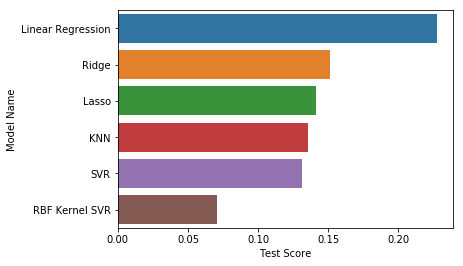

In [51]:
sns.barplot(y =report.index, x = 'Test Score',data = report.sort_values(by='Test Score', ascending=False))

Result from Project 1
<img src="Result Table.png">
<img src="Result 1.png">

PCA result is not bettern than the one from Project 1 on Regression Task

### (5) Deep Learning Task

In [103]:
#Loading packages
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

In [101]:
def create_model():
    # Defining model
    model = Sequential()
    model.add(Dense(12, input_dim=30, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compiling model
    model.compile(loss='mse', optimizer='sgd', metrics=['mse'])
    return model

In [102]:
seed = 10
np.random.seed(10)

In [104]:
model = KerasRegressor(build_fn= create_model, verbose=0)
param_grid = {'batch_size':[5,10,25,50], 'epochs':[10, 50,100]}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

In [105]:
# Fitting model
grid_search_result = grid_search.fit(X_train, y_train)

In [120]:
print("Best parameters: {}".format(grid_search_result.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_result.best_score_))
print()

Best parameters: {'batch_size': 5, 'epochs': 100}
Best cross-validation score: -0.04



In [119]:
grid_train_pred = grid_search_result.predict(X_train)
grid_test_pred = grid_search_result.predict(X_test)

In [123]:
dl_train_score = grid_search_result.best_estimator_.score(X_train, y_train)
dl_test_score = grid_search_result.best_estimator_.score(X_test, y_test)

print('Deep Learning - Train Score: %.2f'%dl_train_score)
print('Deep Learning - Test Score: %.2f '%dl_test_score)

Deep Learning - Train Score: -0.03
Deep Learning - Test Score: -0.03 


In [124]:
from sklearn.metrics import r2_score, recall_score, precision_score

print('Train Score {:.2f}'.format(r2_score(y_train, grid_train_pred)))
print('Test Score {:.2f}'.format(r2_score(y_test, grid_test_pred)))

Train Score 0.86
Test Score 0.87


# Classification Task

In [52]:
# Creating dataset for classification task
clf_data = df.drop(['Audit_Risk','Risk'], axis=1)
clf_target = df['Risk']

# Splitting training and test data
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(clf_data, clf_target, random_state=0)

# Scaling data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [53]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## (1) Two voting classifiers - one with hard voting and one with soft voting

In [54]:
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(7)
knn_clf.fit(X_train, y_train)
svm_clf = SVC(C = 10, probability = True)
svm_clf.fit(X_train, y_train)

voting_hard_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='hard')
voting_hard_clf.fit(X_train, y_train)

print("Hard Voting")
from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_hard_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, 'Test Accuracy Score {:.4f}'.format(accuracy_score(y_test, y_pred)))
print()

("Soft Voting")
voting_soft_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='soft')
voting_soft_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_soft_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, 'Test Accuracy Score {:.4f}'.format(accuracy_score(y_test, y_pred)))

Hard Voting
LogisticRegression Test Accuracy Score 0.9691
KNeighborsClassifier Test Accuracy Score 0.9536
SVC Test Accuracy Score 0.9639
VotingClassifier Test Accuracy Score 0.9691

LogisticRegression Test Accuracy Score 0.9691
KNeighborsClassifier Test Accuracy Score 0.9536
SVC Test Accuracy Score 0.9639
VotingClassifier Test Accuracy Score 0.9742


## (2) Two models with bagging and any two models with pasting

In [55]:
#importing models
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_auc_score, classification_report

In [56]:
#Logistic Regression
print('(1) Logistic Regression')
print()

log = LogisticRegression(C=10, penalty='l1')

log_bag = BaggingClassifier(log, bootstrap=True, n_jobs=-1, random_state=0)
log_bag.fit(X_train, y_train)
y_pred_bag = log_bag.predict(X_test)

print("Bagging")
print("- Accuracy Score")
print("Train Accuracy Score: {:4f}".format(log_bag.score(X_train, y_train)))
print("Test Accuracy Score: {:4f}".format(log_bag.score(X_test, y_test)))
print()

#Classficiation Report
print(classification_report(y_test, y_pred_bag))

#ROC AUC Score
print("- ROC AUC Score")
print("Test AUC Score: {:4f}".format(roc_auc_score(y_test, y_pred_bag)))
print()
print()


log_pas = BaggingClassifier(log, bootstrap=False, n_jobs=-1, random_state=0)
log_pas.fit(X_train, y_train)
y_pred_pas = log_pas.predict(X_test)
print("Pasting")
print("Train Accuracy Score: {:4f}".format(log_pas.score(X_train, y_train)))
print("Test Accuracy Score: {:4f}".format(log_pas.score(X_test, y_test)))
      
#Classficiation Report
print(classification_report(y_test, y_pred_pas))
print()

#ROC AUC Score
print('- ROC AUC Score')
print("Test AUC Score: {:4f}".format(roc_auc_score(y_test, y_pred_pas)))
print()

(1) Logistic Regression

Bagging
- Accuracy Score
Train Accuracy Score: 0.987910
Test Accuracy Score: 0.974227

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       121
           1       1.00      0.93      0.96        73

   micro avg       0.97      0.97      0.97       194
   macro avg       0.98      0.97      0.97       194
weighted avg       0.98      0.97      0.97       194

- ROC AUC Score
Test AUC Score: 0.965753


Pasting
Train Accuracy Score: 0.991364
Test Accuracy Score: 0.979381
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       121
           1       1.00      0.95      0.97        73

   micro avg       0.98      0.98      0.98       194
   macro avg       0.98      0.97      0.98       194
weighted avg       0.98      0.98      0.98       194


- ROC AUC Score
Test AUC Score: 0.972603



In [57]:
#Linear SVC
from sklearn.svm import LinearSVC
print('(1) Linear SVC')
print()

lsvc = LinearSVC(C= 10, penalty = 'l1', dual=False, loss='squared_hinge')

lsvc_bag = BaggingClassifier(lsvc, bootstrap=True, n_jobs=-1, random_state=0)
lsvc_bag.fit(X_train, y_train)
y_pred_bag = lsvc_bag.predict(X_test)

print("Bagging")
print("- Accuracy Score")
print("Train Accuracy Score: {:4f}".format(lsvc_bag.score(X_train, y_train)))
print("Test Accuracy Score: {:4f}".format(lsvc_bag.score(X_test, y_test)))
print()

#Classficiation Report
print(classification_report(y_test, y_pred_bag))

#ROC AUC Score
print("- ROC AUC Score")
print("Test AUC Score: {:4f}".format(roc_auc_score(y_test, y_pred_bag)))
print()
print()


lsvc_pas = BaggingClassifier(lsvc, bootstrap=False, n_jobs=-1, random_state=0)
lsvc_pas.fit(X_train, y_train)
y_pred_pas = log_pas.predict(X_test)
print("Pasting")
print("Train Accuracy Score: {:4f}".format(lsvc_pas.score(X_train, y_train)))
print("Test Accuracy Score: {:4f}".format(lsvc_pas.score(X_test, y_test)))
      
#Classficiation Report
print(classification_report(y_test, y_pred_pas))
print()

#ROC AUC Score
print('- ROC AUC Score')
print("Test AUC Score: {:4f}".format(roc_auc_score(y_test, y_pred_pas)))
print()

(1) Linear SVC

Bagging
- Accuracy Score
Train Accuracy Score: 0.994819
Test Accuracy Score: 0.989691

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       121
           1       1.00      0.97      0.99        73

   micro avg       0.99      0.99      0.99       194
   macro avg       0.99      0.99      0.99       194
weighted avg       0.99      0.99      0.99       194

- ROC AUC Score
Test AUC Score: 0.986301


Pasting
Train Accuracy Score: 0.994819
Test Accuracy Score: 0.989691
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       121
           1       1.00      0.95      0.97        73

   micro avg       0.98      0.98      0.98       194
   macro avg       0.98      0.97      0.98       194
weighted avg       0.98      0.98      0.98       194


- ROC AUC Score
Test AUC Score: 0.972603



##  (3) Two models with adaboost boosting

In [58]:
from sklearn.ensemble import AdaBoostClassifier

#Logistic Regression
print('(1) Logistic Regression')
print()

param_grid = { 'n_estimators': [3, 5, 10, 50, 75, 100],
              'learning_rate' : [0.01, 0.05, 0.1, 0.5,1] }
ada_grid = GridSearchCV(AdaBoostClassifier(LogisticRegression(C=10, penalty='l1')), 
                        param_grid,n_jobs=-1)
ada_grid.fit(X_train, y_train)
print('Best Parameter: {}'.format(ada_grid.best_params_))
print()

ada_clf = AdaBoostClassifier(LogisticRegression(), learning_rate=0.05, n_estimators=50)
ada_clf.fit(X_train, y_train)
y_pred_ada = ada_clf.predict(X_test)

print("- Accuracy Score")
print("Train Accuracy Score: {:4f}".format(ada_clf.score(X_train, y_train)))
print("Test Accuracy Score: {:4f}".format(ada_clf.score(X_test, y_test)))
print()

#Classficiation Report
print(classification_report(y_test, y_pred_ada))

#ROC AUC Score
print("- ROC AUC Score")
print("Test AUC Score: {:4f}".format(roc_auc_score(y_test, y_pred_ada)))
print()
print()


(1) Logistic Regression

Best Parameter: {'learning_rate': 0.05, 'n_estimators': 50}

- Accuracy Score
Train Accuracy Score: 0.918826
Test Accuracy Score: 0.917526

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       121
           1       1.00      0.78      0.88        73

   micro avg       0.92      0.92      0.92       194
   macro avg       0.94      0.89      0.91       194
weighted avg       0.93      0.92      0.92       194

- ROC AUC Score
Test AUC Score: 0.890411




In [59]:
from sklearn.svm import LinearSVC
#Linear SVC
print('(2) Linear SVC')
print()

param_grid = { 'n_estimators': [3, 5, 10, 50, 75, 100],
              'learning_rate' : [0.01, 0.05, 0.1, 0.5,1] }
ada_grid = GridSearchCV(AdaBoostClassifier(LinearSVC(C= 10, penalty = 'l1', dual=False, loss='squared_hinge'),
                                           algorithm='SAMME'), param_grid,n_jobs=-1)
ada_grid.fit(X_train, y_train)
print('Best Parameter: {}'.format(ada_grid.best_params_))
print()

ada_clf = AdaBoostClassifier(LinearSVC(C= 10, penalty = 'l1', dual=False, loss='squared_hinge'), 
                             algorithm='SAMME', learning_rate=0.01, n_estimators=3)
ada_clf.fit(X_train, y_train)
y_pred_ada = ada_clf.predict(X_test)

print("- Accuracy Score")
print("Train Accuracy Score: {:4f}".format(ada_clf.score(X_train, y_train)))
print("Test Accuracy Score: {:4f}".format(ada_clf.score(X_test, y_test)))
print()

#Classficiation Report
print(classification_report(y_test, y_pred_ada))

#ROC AUC Score
print("- ROC AUC Score")
print("Test AUC Score: {:4f}".format(roc_auc_score(y_test, y_pred_ada)))


(2) Linear SVC

Best Parameter: {'learning_rate': 0.01, 'n_estimators': 3}

- Accuracy Score
Train Accuracy Score: 0.994819
Test Accuracy Score: 0.989691

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       121
           1       1.00      0.97      0.99        73

   micro avg       0.99      0.99      0.99       194
   macro avg       0.99      0.99      0.99       194
weighted avg       0.99      0.99      0.99       194

- ROC AUC Score
Test AUC Score: 0.986301


## (4) One model with gradient boosting 

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

print('(1) Gradient Boosted Classification Trees')
print()

param_grid = {
    "learning_rate": [0.01, 0.05, 0.1, 0.5],
    "max_depth":[3,5,8, 10],
    "subsample":[0.5, 0.75, 1.0],
    "n_estimators":[3, 5, 8, 10]
    }

gbr_grid = GridSearchCV(GradientBoostingClassifier(random_state=1),  
                        param_grid,n_jobs=-1)
gbr_grid.fit(X_train, y_train)
print('Best Parameter: {}'.format(gbr_grid.best_params_))

(1) Gradient Boosted Classification Trees

Best Parameter: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 5, 'subsample': 0.75}


In [61]:
gbr_clf = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=58, subsample =0.75, random_state=0)
gbr_clf.fit(X_train, y_train)
y_pred_gbr = gbr_clf.predict(X_test)

print("- Accuracy Score")
print("Train Accuracy Score: {:4f}".format(gbr_clf.score(X_train, y_train)))
print("Test Accuracy Score: {:4f}".format(gbr_clf.score(X_test, y_test)))
print()

#Classficiation Report
print(classification_report(y_test, y_pred_gbr))

#ROC AUC Score
print("- ROC AUC Score")
print("Test AUC Score: {:4f}".format(roc_auc_score(y_test, y_pred_gbr)))


- Accuracy Score
Train Accuracy Score: 1.000000
Test Accuracy Score: 1.000000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00        73

   micro avg       1.00      1.00      1.00       194
   macro avg       1.00      1.00      1.00       194
weighted avg       1.00      1.00      1.00       194

- ROC AUC Score
Test AUC Score: 1.000000


### (5) PCA

In [62]:
# Dimension Reduction
pca = PCA(0.95)
X_reduced_train = pca.fit_transform(X_train)
X_reduced_test = pca.transform(X_test)

print('Number of dimensions:', pca.n_components_) 
print('Explained Variance Ratio:',1- pca.explained_variance_ratio_.sum())

Number of dimensions: 8
Explained Variance Ratio: 0.04320262807034925


In [63]:
#(1) KNN 
knn = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(1,11,1)}

#cv =5
grid = GridSearchCV(knn, parameters, scoring='roc_auc',cv=5, n_jobs = -1)
grid.fit(X_reduced_train, y_train)
print('cv=5')
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.4f}".format(grid.best_score_))
print()


cv=5
Best parameters: {'n_neighbors': 7}
Best cross-validation score: 0.9890



In [64]:
knnclf_accuracy_train = grid.best_estimator_.score(X_reduced_train, y_train)
knnclf_accuracy_test = grid.best_estimator_.score(X_reduced_test, y_test)

print('KNN Classifier - Train Accuracy: %.4f'%knnclf_accuracy_train)
print('KNN Classifier - Test Accuracy: %.4f '%knnclf_accuracy_test)

KNN Classifier - Train Accuracy: 0.9637
KNN Classifier - Test Accuracy: 0.9433 


In [65]:
knnclf_auc_train = roc_auc_score(y_train, grid.predict(X_reduced_train))
knnclf_auc_test = roc_auc_score(y_test, grid.predict(X_reduced_test))

print('KNN Classifier - Train ROC AUC Score: %.4f'%knnclf_auc_train)
print('KNN Classifier - Test ROC AUC Score: %.4f '%knnclf_auc_test)

KNN Classifier - Train ROC AUC Score: 0.9576
KNN Classifier - Test ROC AUC Score: 0.9247 


In [66]:
pred = grid.predict(X_reduced_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       121
           1       1.00      0.85      0.92        73

   micro avg       0.94      0.94      0.94       194
   macro avg       0.96      0.92      0.94       194
weighted avg       0.95      0.94      0.94       194



In [67]:
report_table = [['KNN', 'n=7',knnclf_accuracy_train, knnclf_accuracy_test, knnclf_auc_train,knnclf_auc_test]]

In [68]:
#(2) Logistic Regression
model = LogisticRegression(random_state=0)
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

#cv =5
grid = GridSearchCV(model, parameters, scoring='roc_auc', cv=5, n_jobs = -1)
grid.fit(X_reduced_train, y_train)
print('cv=5')
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.4f}".format(grid.best_score_))
print()


cv=5
Best parameters: {'C': 100, 'penalty': 'l2'}
Best cross-validation score: 0.9935



In [69]:
logistic_accuracy_train = grid.best_estimator_.score(X_reduced_train, y_train)
logistic_accuracy_test = grid.best_estimator_.score(X_reduced_test, y_test)

print('Logistic Regression Classifier - Train Accuracy: %.4f'%logistic_accuracy_train)
print('Logistic Regression Classifier - Test Accuracy: %.4f '%logistic_accuracy_test)

Logistic Regression Classifier - Train Accuracy: 0.9672
Logistic Regression Classifier - Test Accuracy: 0.9794 


In [70]:
logistic_auc_train = roc_auc_score(y_train, grid.predict(X_reduced_train))
logistic_auc_test = roc_auc_score(y_test, grid.predict(X_reduced_test))

print('Logstic Regression - Train ROC AUC Score: %.4f'%logistic_auc_train)
print('Logistic Regression - Test ROC AUC Score: %.4f '%logistic_auc_test)

Logstic Regression - Train ROC AUC Score: 0.9641
Logistic Regression - Test ROC AUC Score: 0.9726 


In [71]:
pred = grid.predict(X_reduced_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       121
           1       1.00      0.95      0.97        73

   micro avg       0.98      0.98      0.98       194
   macro avg       0.98      0.97      0.98       194
weighted avg       0.98      0.98      0.98       194



In [72]:
report_table = report_table + [['Logistic Regression', 'C=100, penalty=l2', 
                                logistic_accuracy_train, logistic_accuracy_test, logistic_auc_train,logistic_auc_test]]

In [73]:
#(3) Linear SVC
model = LinearSVC(random_state=0)
parameters = [{'C':[0.001, 0.01, 0.1, 1, 10, 100], 'penalty':['l2'],'loss':['hinge','squared_hinge']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100], 'penalty':['l1'], 'dual':[False], 'loss':['squared_hinge']}]

#cv =5
grid = GridSearchCV(model, parameters, scoring= 'roc_auc', cv=5, n_jobs = -1)
grid.fit(X_reduced_train, y_train)
print('cv=5')
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.4f}".format(grid.best_score_))
print()


cv=5
Best parameters: {'C': 100, 'loss': 'squared_hinge', 'penalty': 'l2'}
Best cross-validation score: 0.9946



In [74]:
lsvc_accuracy_train = grid.best_estimator_.score(X_reduced_train, y_train)
lsvc_accuracy_test = grid.best_estimator_.score(X_reduced_test, y_test) 

print('Linear SVC - Train Accuracy: %.4f'%lsvc_accuracy_train)
print('Linear SVC - Test Accuracy: %.4f '%lsvc_accuracy_test)

Linear SVC - Train Accuracy: 0.9672
Linear SVC - Test Accuracy: 0.9742 


In [75]:
lsvc_auc_train = roc_auc_score(y_train, grid.predict(X_reduced_train))
lsvc_auc_test = roc_auc_score(y_test, grid.predict(X_reduced_test))

print('Linear SVC - Train ROC AUC Score: %.4f'%lsvc_auc_train)
print('Linear SVC - Test ROC AUC Score: %.4f '%lsvc_auc_test)

Linear SVC - Train ROC AUC Score: 0.9641
Linear SVC - Test ROC AUC Score: 0.9685 


In [76]:
pred = grid.predict(X_reduced_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       121
           1       0.99      0.95      0.97        73

   micro avg       0.97      0.97      0.97       194
   macro avg       0.98      0.97      0.97       194
weighted avg       0.97      0.97      0.97       194



In [77]:
report_table  = report_table +[['Linear SVC', 'C=100, penalty=l2', 
                                lsvc_accuracy_train, lsvc_accuracy_test,lsvc_auc_train,lsvc_auc_test]]

In [78]:
#(4) RBF Kernel SVC
model = SVC(kernel='rbf', random_state=0)
parameters = [{'C':[0.001, 0.01, 0.1, 1, 10, 100], 'gamma':[0.001,0.01,0.1,1,10,100]}]

#cv =5
grid = GridSearchCV(model, parameters, scoring = 'roc_auc',cv=5, n_jobs = -1)
grid.fit(X_reduced_train, y_train)
print('cv=5')
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.4f}".format(grid.best_score_))
print()


cv=5
Best parameters: {'C': 0.001, 'gamma': 1}
Best cross-validation score: 0.9948



In [79]:
rbf_svc_accuracy_train = grid.best_estimator_.score(X_reduced_train, y_train)
rbf_svc_accuracy_test = grid.best_estimator_.score(X_reduced_test, y_test)

print('RBF SVC - Train Accuracy: %.4f'%rbf_svc_accuracy_train)
print('RBF SVC - Test Accuracy: %.4f '%rbf_svc_accuracy_test)

RBF SVC - Train Accuracy: 0.5993
RBF SVC - Test Accuracy: 0.6237 


In [80]:
rbf_svc_auc_train = roc_auc_score(y_train, grid.predict(X_reduced_train))
rbf_svc_auc_test = roc_auc_score(y_test, grid.predict(X_reduced_test))

print('RBF Kernel SVC - Train ROC AUC Score: %.4f'%rbf_svc_auc_train)
print('RBF Kernel SVC - Test ROC AUC Score: %.4f '%rbf_svc_auc_test)

RBF Kernel SVC - Train ROC AUC Score: 0.5000
RBF Kernel SVC - Test ROC AUC Score: 0.5000 


In [81]:
pred = grid.predict(X_reduced_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       121
           1       0.00      0.00      0.00        73

   micro avg       0.62      0.62      0.62       194
   macro avg       0.31      0.50      0.38       194
weighted avg       0.39      0.62      0.48       194



In [82]:
report_table = report_table +[['rbf Kernelized Support Vector Machine', 'C=0.001,gamma=1', 
                               rbf_svc_accuracy_train, rbf_svc_accuracy_test,rbf_svc_auc_train, rbf_svc_auc_test]]

In [83]:
#(5) Decission Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)
parameters = [{'max_depth':[1,2,3,4,5,6,7,8,9,10], 'max_features':[1,2,3,4,5,6,7,8]}]

#cv =5
grid = GridSearchCV(model, parameters, scoring='roc_auc', cv=5, n_jobs = -1)
grid.fit(X_reduced_train, y_train)
print('cv=5')
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.4f}".format(grid.best_score_))
print()

cv=5
Best parameters: {'max_depth': 4, 'max_features': 3}
Best cross-validation score: 0.9735



C:\Users\josep\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [84]:
dtree_accuracy_train = grid.best_estimator_.score(X_reduced_train, y_train)
dtree_accuracy_test = grid.best_estimator_.score(X_reduced_test, y_test)

print('Decision Tree Classofier - Train Accuracy: %.4f'%dtree_accuracy_train)
print('Decision Tree Classifier - Test Accuracy: %.4f '%dtree_accuracy_test)

Decision Tree Classofier - Train Accuracy: 0.9706
Decision Tree Classifier - Test Accuracy: 0.9639 


In [85]:
dtree_auc_train = roc_auc_score(y_train, grid.predict(X_reduced_train))
dtree_auc_test = roc_auc_score(y_test, grid.predict(X_reduced_test))

print('Decision Tree Classifier - Train ROC AUC Score: %.4f'%dtree_auc_train)
print('Decision Tree Classifier - Test ROC AUC Score: %.4f '%dtree_auc_test)

Decision Tree Classifier - Train ROC AUC Score: 0.9662
Decision Tree Classifier - Test ROC AUC Score: 0.9521 


In [86]:
pred = grid.predict(X_reduced_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       121
           1       1.00      0.90      0.95        73

   micro avg       0.96      0.96      0.96       194
   macro avg       0.97      0.95      0.96       194
weighted avg       0.97      0.96      0.96       194



In [87]:
report_table = report_table +[['Decision Tree Classification', 'max_depth=4, max_features=3',
                               dtree_accuracy_train, dtree_accuracy_test, dtree_auc_train, dtree_auc_test]]

In [88]:
report_table = pd.DataFrame(report_table, columns = ['Model Name', 'Model Parameter', 'Train Accuracy', 'Test Accuracy', 'Train AUC Score', 'Test AUC Score'])
report_table.index = report_table['Model Name']
report_table.drop(['Model Name'],axis=1,inplace=True)

In [89]:
report_table.sort_values(by=['Test Accuracy','Test AUC Score'], ascending = False)

,Model Parameter,Train Accuracy,Test Accuracy,Train AUC Score,Test AUC Score
Model Name,,,,,
Logistic Regression,"C=100, penalty=l2",0.967185,0.979381,0.964051,0.972603
Linear SVC,"C=100, penalty=l2",0.967185,0.974227,0.964051,0.968471
Decision Tree Classification,"max_depth=4, max_features=3",0.970639,0.963918,0.966219,0.952055
KNN,n=7,0.963731,0.943299,0.957598,0.924658
rbf Kernelized Support Vector Machine,"C=0.001,gamma=1",0.599309,0.623711,0.500000,0.500000


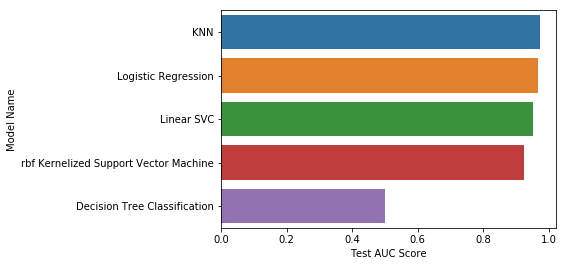

In [90]:
sns.barplot(y =report_table.index, x = 'Test AUC Score', data= report_table.sort_values(by='Test AUC Score', ascending=False))

Result from Project 1
<img src="Result1.png">

PCA result is not better than the one from Project 1 on Classification Task

### (6) Deep Learning Task

In [125]:
from keras.wrappers.scikit_learn import KerasClassifier

def create_model():
    # Defining model
    model = Sequential()
    model.add(Dense(12, input_dim=30,activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compiling model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [126]:
model = KerasClassifier(build_fn= create_model, verbose=0)
param_grid = {'batch_size':[5,10,25,50], 'epochs':[10, 50,100]}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

In [127]:
# Fitting model
grid_search_result = grid_search.fit(X_train, y_train)

In [132]:
print("Best parameters: {}".format(grid_search_result.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_result.best_score_))
print()

Best parameters: {'batch_size': 5, 'epochs': 100}
Best cross-validation score: 0.99



In [134]:
dl_accuracy_train = grid_search_result.best_estimator_.score(X_train, y_train)
dl_accuracy_test = grid_search_result.best_estimator_.score(X_test, y_test)

print('Deep Learning - Train Accuracy: %.4f'%dl_accuracy_train)
print('Deep Learning - Test Accuracy: %.4f '%dl_accuracy_test)

Deep Learning - Train Accuracy: 0.9948
Deep Learning - Test Accuracy: 0.9897 


dl_train_score = grid_search_result.best_estimator_.score(X_train, y_train)
dl_test_score = grid_search_result.best_estimator_.score(X_test, y_test)

print('Deep Learning - Train Score: %.2f'%dl_train_score)
print('Deep Learning - Test Score: %.2f '%dl_test_score)

In [138]:
grid_train_pred = grid_search_result.predict(X_train)
grid_test_pred = grid_search_result.predict(X_test)

print('Deep Learning - ROC AUC Score {:.4f}'.format(roc_auc_score(y_train, grid_train_pred)))
print('Deep Learning - ROC AUC Score {:.4f}'.format(roc_auc_score(y_test, grid_test_pred)))

Deep Learning - ROC AUC Score 0.9950
Deep Learning - ROC AUC Score 0.9890
